In [90]:
%matplotlib inline

import math
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

In [91]:
status = pd.read_csv("Set de datos TP1/status.csv",iterator=True,chunksize=100000)
station = pd.read_csv("Set de datos TP1/station.csv")
weather = pd.read_csv("Set de datos TP1/weather.csv")
trip = pd.read_csv("Set de datos TP1/trip.csv")

In [92]:
#Status es muy grande como para procesarlo todo junto, tomamos solamente una parte para ver qué tipo de datos tiene
status_part_1 = status.get_chunk()

In [5]:
#Para cada estación tenemos, minuto a minuto, la información de cuántas bicicletas disponibles hay.
status_part_1

,station_id,bikes_available,docks_available,time
0,2,2,25,2013/08/29 12:06:01
1,2,2,25,2013/08/29 12:07:01
2,2,2,25,2013/08/29 12:08:01
3,2,2,25,2013/08/29 12:09:01
4,2,2,25,2013/08/29 12:10:01
5,2,2,25,2013/08/29 12:11:01
6,2,2,25,2013/08/29 12:12:01
7,2,2,25,2013/08/29 12:13:01
8,2,2,25,2013/08/29 12:15:01
9,2,2,25,2013/08/29 12:16:02


In [5]:
#Verificamos los tipos de datos
status_part_1.dtypes

station_id          int64
bikes_available     int64
docks_available     int64
time               object
dtype: object

In [6]:
#Vemos qué forma tiene station. Podemos ver que cada registro nos muestra información sobre cada una de las 
#estaciones del circuito.
station

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013
5,7,Paseo de San Antonio,37.333798,-121.886943,15,San Jose,8/7/2013
6,8,San Salvador at 1st,37.330165,-121.885831,15,San Jose,8/5/2013
7,9,Japantown,37.348742,-121.894715,15,San Jose,8/5/2013
8,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013
9,11,MLK Library,37.335885,-121.885660,19,San Jose,8/6/2013


In [56]:
#Verificación de los tipos
station.dtypes

id                     int64
name                  object
lat                  float64
long                 float64
dock_count             int64
city                  object
installation_date     object
dtype: object

In [60]:
#Weather nos da información de las condiciones meteorológicas día a día. La columna zip code representa a qué
#costa de san francisco pertenece la información. Es por eso que los se repite el mismo día varias veces, cada
#uno de esos días repetidos pertenece a una costa diferente
weather

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74,68,61,61,58,56,93,75,57,...,10,10,23,11,28,0,4,NaN,286,94107
1,8/30/2013,78,69,60,61,58,56,90,70,50,...,10,7,29,13,35,0,2,NaN,291,94107
2,8/31/2013,71,64,57,57,56,54,93,75,57,...,10,10,26,15,31,0,4,NaN,284,94107
3,9/1/2013,74,66,58,60,56,53,87,68,49,...,10,10,25,13,29,0,4,NaN,284,94107
4,9/2/2013,75,69,62,61,60,58,93,77,61,...,10,6,23,12,30,0,6,NaN,277,94107
5,9/3/2013,73,67,60,59,56,51,84,65,46,...,10,10,24,15,31,0,2,NaN,276,94107
6,9/4/2013,74,68,61,59,57,56,90,72,53,...,10,10,29,19,35,0,4,NaN,269,94107
7,9/5/2013,72,66,60,57,56,54,90,74,57,...,10,10,31,21,37,0,3,NaN,270,94107
8,9/6/2013,85,71,56,57,51,45,86,58,29,...,10,10,24,8,28,0,0,NaN,287,94107
9,9/7/2013,88,73,58,64,54,46,86,59,31,...,10,10,21,8,25,0,1,NaN,305,94107


In [62]:
#Verificamos los tipos, vemos que el campo precipitation_inches es un object. Sería más apropiado que fuera
#float 64. 
weather.dtypes

date                               object
max_temperature_f                 float64
mean_temperature_f                float64
min_temperature_f                 float64
max_dew_point_f                   float64
mean_dew_point_f                  float64
min_dew_point_f                   float64
max_humidity                      float64
mean_humidity                     float64
min_humidity                      float64
max_sea_level_pressure_inches     float64
mean_sea_level_pressure_inches    float64
min_sea_level_pressure_inches     float64
max_visibility_miles              float64
mean_visibility_miles             float64
min_visibility_miles              float64
max_wind_Speed_mph                float64
mean_wind_speed_mph               float64
max_gust_speed_mph                float64
precipitation_inches               object
cloud_cover                       float64
events                             object
wind_dir_degrees                  float64
zip_code                          

In [9]:
#Ahora sí, está corregido
weather.precipitation_inches = pd.to_numeric(weather.precipitation_inches, errors = 'coerce')
weather.dtypes

date                               object
max_temperature_f                 float64
mean_temperature_f                float64
min_temperature_f                 float64
max_dew_point_f                   float64
mean_dew_point_f                  float64
min_dew_point_f                   float64
max_humidity                      float64
mean_humidity                     float64
min_humidity                      float64
max_sea_level_pressure_inches     float64
mean_sea_level_pressure_inches    float64
min_sea_level_pressure_inches     float64
max_visibility_miles              float64
mean_visibility_miles             float64
min_visibility_miles              float64
max_wind_Speed_mph                float64
mean_wind_speed_mph               float64
max_gust_speed_mph                float64
precipitation_inches              float64
cloud_cover                       float64
events                             object
wind_dir_degrees                  float64
zip_code                          

In [93]:
#En trip tenemos información sobre cada uno de los viajes que se realizaron durante el período analizado
trip

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103
5,4927,103,8/29/2013 18:54,Golden Gate at Polk,59,8/29/2013 18:56,Golden Gate at Polk,59,527,Subscriber,94109
6,4500,109,8/29/2013 13:25,Santa Clara at Almaden,4,8/29/2013 13:27,Adobe on Almaden,5,679,Subscriber,95112
7,4563,111,8/29/2013 14:02,San Salvador at 1st,8,8/29/2013 14:04,San Salvador at 1st,8,687,Subscriber,95112
8,4760,113,8/29/2013 17:01,South Van Ness at Market,66,8/29/2013 17:03,South Van Ness at Market,66,553,Subscriber,94103
9,4258,114,8/29/2013 11:33,San Jose City Hall,10,8/29/2013 11:35,MLK Library,11,107,Subscriber,95060


In [94]:
#Voy a eliminarle la hora a las fechas, me entorpece y no aporta a lo que estoy tratando de hacer ahora

#trip.start_date = trip['start_date'].str[:9]    #Esto no funciona del todo
#trip.end_date = trip.end_date.str[:9]
#trip

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013,South Van Ness at Market,66,8/29/2013,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013,San Jose City Hall,10,8/29/2013,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013,Mountain View City Hall,27,8/29/2013,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013,San Jose City Hall,10,8/29/2013,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013,South Van Ness at Market,66,8/29/2013,Market at 10th,67,319,Subscriber,94103
5,4927,103,8/29/2013,Golden Gate at Polk,59,8/29/2013,Golden Gate at Polk,59,527,Subscriber,94109
6,4500,109,8/29/2013,Santa Clara at Almaden,4,8/29/2013,Adobe on Almaden,5,679,Subscriber,95112
7,4563,111,8/29/2013,San Salvador at 1st,8,8/29/2013,San Salvador at 1st,8,687,Subscriber,95112
8,4760,113,8/29/2013,South Van Ness at Market,66,8/29/2013,South Van Ness at Market,66,553,Subscriber,94103
9,4258,114,8/29/2013,San Jose City Hall,10,8/29/2013,MLK Library,11,107,Subscriber,95060


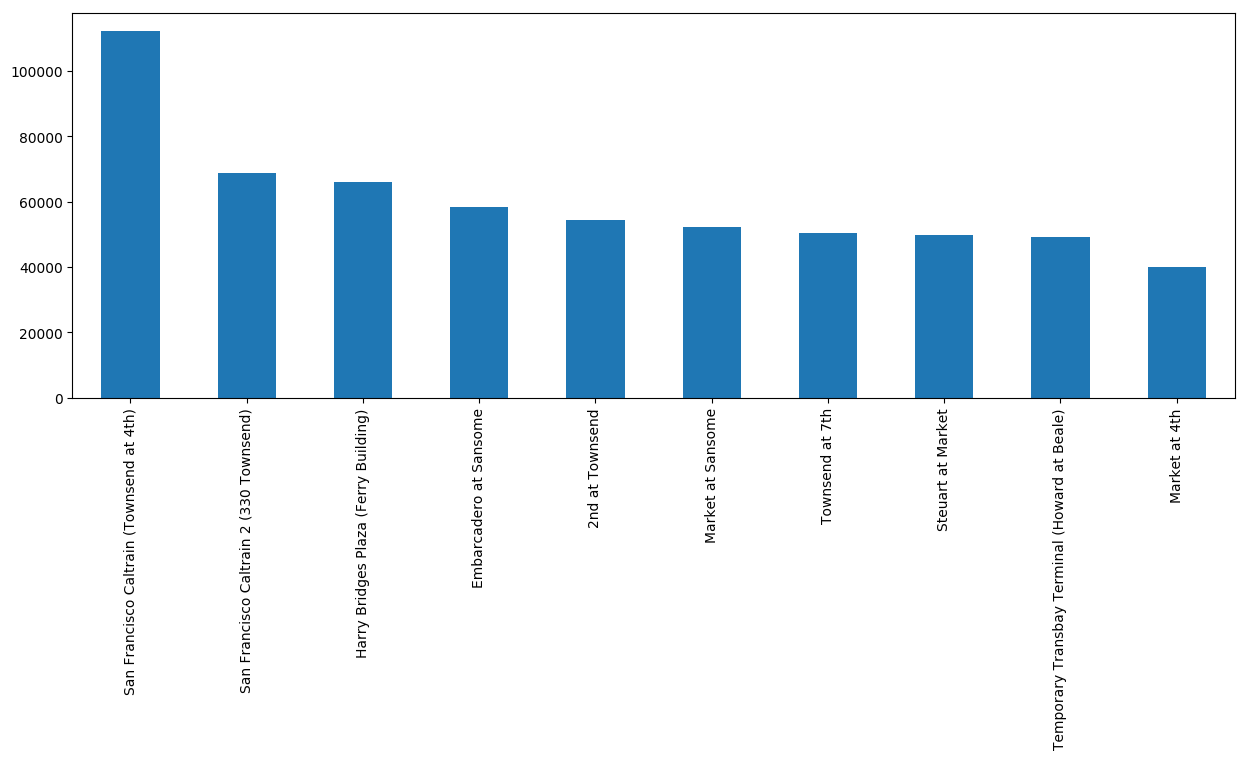

In [95]:
#Comenzamos haciendo un analisis de las estaciones, veamos cuáles son las diez más populares

most_popular_start_stations = trip.start_station_name.value_counts().sort_values(ascending = False)
most_popular_end_stations = trip.end_station_name.value_counts().sort_values(ascending = False)
most_popular_stations = (most_popular_start_stations + most_popular_end_stations).sort_values(ascending = False)
most_popular_stations[:10].plot('bar')


In [100]:
#Averiguemos ahora la cantidad de viajes que hubo para cada uno de los días del dataset
trip.start_date.value_counts()

10/16/201    2627
10/15/201    2557
10/14/201    2546
10/30/201    2533
11/12/201    2517
10/29/201    2504
10/17/201    2484
10/24/201    2480
10/21/201    2425
10/23/201    2418
10/28/201    2386
10/10/201    2385
10/22/201    2345
11/18/201    2330
11/14/201    2325
11/21/201    2312
11/25/201    2202
11/11/201    2199
12/10/201    2157
11/13/201    2135
12/18/201    2054
10/31/201    1998
10/13/201    1833
11/10/201    1786
12/17/201    1784
11/26/201    1762
10/20/201    1718
12/16/201    1716
11/17/201    1710
10/27/201    1685
             ... 
2/23/2014     317
9/21/2014     313
8/23/2015     311
4/12/2015     303
6/21/2015     298
12/7/2014     296
1/5/2014      296
4/26/2015     291
2/22/2015     289
7/5/2015      288
1/3/2015      283
3/22/2015     280
12/7/2013     277
1/18/2015     275
12/8/2013     274
6/14/2015     269
5/10/2015     267
5/31/2015     266
1/25/2015     259
2/1/2015      251
1/11/2014     247
4/5/2015      216
3/2/2014      208
1/4/2015      206
1/1/2015  